<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Perfis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de perfis dos usuários do forum #stackoverflow

In [ ]:
import pandas as pd
from pandas._config.config import reset_option
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# habilita a leitura a partir de um arquivo no drive da conta do usuário
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
########### ATENÇÃO ###########
# Funções de apoio NÃO APAGAR #
###############################

def format_percent(value):
  return f'{100 * value:.2f}%'

def calculaPercentualNulos(dataFrame):
  return (df.isna().sum() / len(df)).sort_values(ascending=False).apply(format_percent)

def graficoNulos(dados):
  resultado=(df.isna().sum() / len(df)).sort_values(ascending=False).reset_index()
  resultado.columns = ['Coluna','Percentual']

  fig, ax = plt.subplots(figsize=(15,6))
  sns.barplot(data=resultado,x='Coluna',y='Percentual')
  fig.suptitle("Percentual de valore nulos em cada coluna")
  plt.xticks(rotation=90)
  plt.show()
  return

def contaCategorico(dataFrame,coluna,tipoContagem=False,incluiNulos=''):
  if tipoContagem=='%':
    if incluiNulos=='nulos':
      resultado=dataFrame[coluna].value_counts(normalize=True, dropna=False).apply(format_percent)
    else:
      resultado=dataFrame[coluna].value_counts(normalize=True).apply(format_percent)
  else:
    if incluiNulos=='nulos':
      resultado=dataFrame[coluna].value_counts(dropna=False)
    else:
      resultado=dataFrame[coluna].value_counts()
  return resultado


def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numérico'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Data'
    elif unique_count==total_count:
        return 'Texto (sem repetição de valores)'
    else:
        return 'Categórico'

def lista_CategoriaColunas(dataFrame):
    for column_name in df.columns:
        print(column_name, ":", get_var_category(df[column_name]))

# tabela de cores
# https://matplotlib.org/stable/gallery/color/named_colors.html

def boxPlot(dataFrame,coluna,titulo='',tamanhoIntervalo=0.0,cor='dodgerblue'):
  fig, ax = plt.subplots(figsize=(15,8))
  if tamanhoIntervalo>=1:
    # whish ajusta o corte dos outliers
    sns.boxplot(data=df,x=coluna,whis=tamanhoIntervalo,color=cor)
  else:
    sns.boxplot(data=df,x=coluna,color=cor)
  if titulo!='':
    fig.suptitle(titulo)
  plt.show;

def histograma(dataFrame,coluna,titulo='',tamanhoGrupo=0.0,linha='',cor='dodgerblue'):
  #sns.set()
  #sns.set_context('poster')
  fig, ax = plt.subplots(figsize=(15,8))
  if tamanhoGrupo>=1:
    sns.histplot(data=df,ax=ax,x=coluna,binwidth=tamanhoGrupo,color=cor)
  else:
    sns.histplot(data=df,ax=ax,x=coluna,color=cor)
  if linha!='':
    sns.histplot(data=df,ax=ax,x=coluna,binwidth=tamanhoGrupo,kde=True,color=cor)
  if titulo!='':
    fig.suptitle(titulo)
  plt.show;

def histogramaBoxplot(dataFrame,coluna,titulo='',tamanhoGrupo=0,tamanhoIntervalo=0,cor='dodgerblue'):
  quantile_args = {
    'linewidth': 2,
    'color': '#453698',
    'linestyle': '--',
  }
  mean_args = {
    'linewidth': 1,
    'color': '#342345',
    'linestyle': '-',
  }

  fig, (ax_cima, ax_baixo) = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)

  if tamanhoGrupo>=1:
    sns.histplot(data=dataFrame, ax=ax_cima, x=coluna, binwidth=tamanhoGrupo, kde=True,color=cor)
  else:
    sns.histplot(data=dataFrame, ax=ax_cima, x=coluna, kde=True,color=cor)
  for q in [0.25, 0.5, 0.75]:
      ax_cima.axvline(dataFrame[coluna].quantile(q), **quantile_args)
  ax_cima.axvline(dataFrame[coluna].mean(), **mean_args)

  if tamanhoIntervalo>=1:
    sns.boxplot(data=dataFrame, ax=ax_baixo, x=coluna, whis=tamanhoIntervalo,color=cor)
  else:
    sns.boxplot(data=dataFrame, ax=ax_baixo, x=coluna, color=cor)

  ax_baixo.axvline(dataFrame[coluna].mean(), **mean_args)

  if titulo!='':
    fig.suptitle(titulo)

  plt.show()

def violino(dataFrame,coluna,titulo='',cor='dodgerblue'):
  quantile_args = {
      'linewidth': 2,
      'color': '#453698',
      'linestyle': '--',
  }
  mean_args = {
      'linewidth': 1,
      'color': '#342345',
      'linestyle': '-',
  }

  fig, ax = plt.subplots(figsize=(12, 8))

  sns.violinplot(data=dataFrame, ax=ax, x=coluna,color=cor)
  for q in [0.25, 0.5, 0.75]:
      ax.axvline(dataFrame[coluna].quantile(q), **quantile_args)
  ax.axvline(dataFrame[coluna].mean(), **mean_args)

  if titulo!='':
    fig.suptitle(titulo)

  plt.show()

def violinoDuasColunas(dataFrame,coluna1,coluna2,titulo):
  fig, ax = plt.subplots(figsize=(12, 8))

  sns.violinplot(data=dataFrame, ax=ax, x=coluna1, y=coluna2)
  fig.suptitle('Anos de experiência em programação')

  plt.show()

In [ ]:
# lendo o dataframe
df=pd.read_csv("/content/drive/MyDrive/datasets/survey_results_public.csv")

In [ ]:
# lendo o dataframe e especificando a coluna ResponseId como índice do dataframe
df=pd.read_csv("/content/drive/MyDrive/datasets/survey_results_public.csv",index_col='ResponseId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [ ]:
calculaPercentualNulos(df)

VCHostingPersonal use             100.00%
VCHostingProfessional use         100.00%
LearnCodeCoursesCert               59.89%
OfficeStackAsyncWantToWorkWith     56.23%
Frequency_3                        52.89%
                                   ...   
SOAccount                           2.31%
LearnCode                           2.30%
Employment                          2.13%
Country                             2.04%
MainBranch                          0.00%
Length: 78, dtype: object

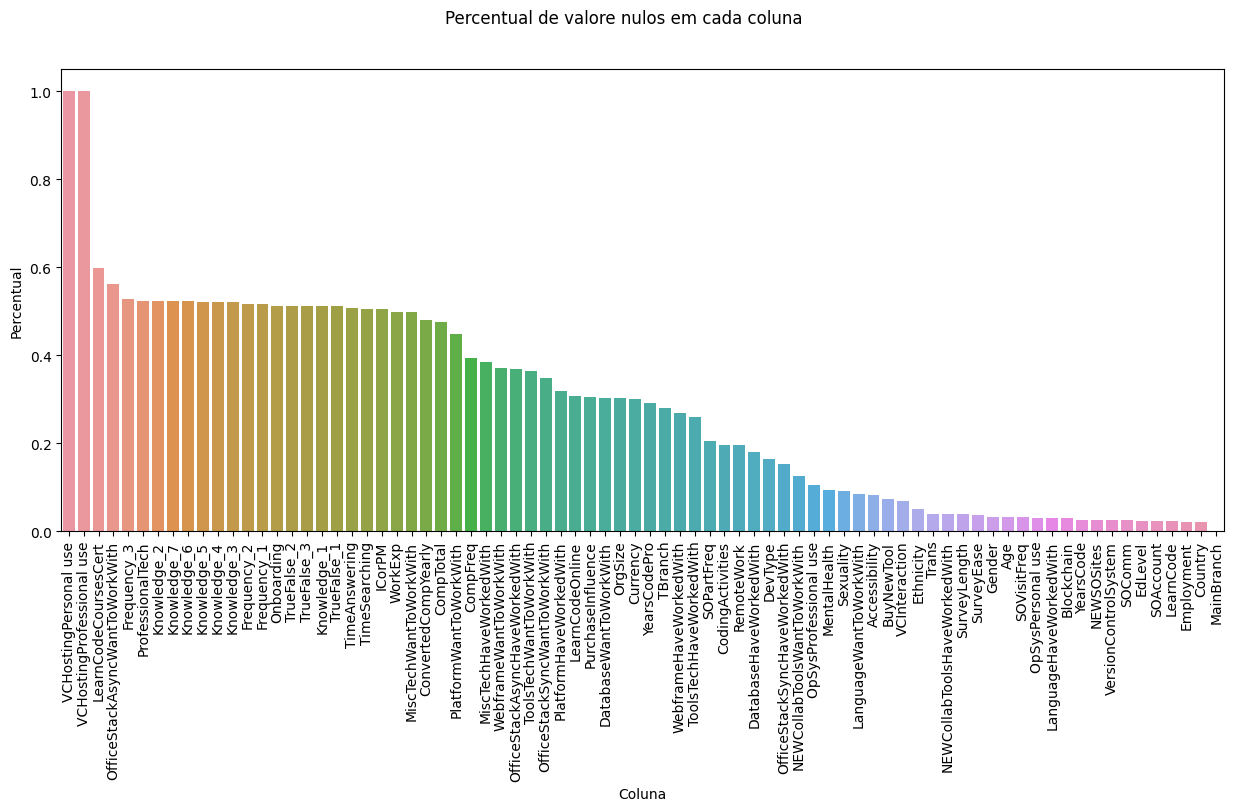

In [ ]:
graficoNulos(df)

In [ ]:
# mostra apenas as colunas do tipo float
df.select_dtypes(float)

,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
ResponseId,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,32000.0,NaN,NaN,NaN,40205.0
4,60000.0,NaN,NaN,NaN,215232.0
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
73264,60000.0,NaN,NaN,5.0,NaN
73265,107000.0,NaN,NaN,6.0,NaN
73266,NaN,NaN,NaN,42.0,NaN


In [ ]:
# mostra apenas as colunas do tipo integer
df.select_dtypes(int)

""
ResponseId
1
2
3
4
5
...
73264
73265
73266


In [ ]:
# mostra apenas as colunas do tipo float e integer
df.select_dtypes('number')

,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
ResponseId,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,32000.0,NaN,NaN,NaN,40205.0
4,60000.0,NaN,NaN,NaN,215232.0
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
73264,60000.0,NaN,NaN,5.0,NaN
73265,107000.0,NaN,NaN,6.0,NaN
73266,NaN,NaN,NaN,42.0,NaN


In [ ]:
# resumo estatístico das colunas numéricas, utilizando um arredondamento de 2 casas decimais
# o método describe já elimina os valores nulos
df.describe().round(2)

,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,3.842200e+04,0.0,0.0,36769.00,38071.00
mean,2.342434e+52,NaN,NaN,10.24,170761.28
std,4.591478e+54,NaN,NaN,8.71,781413.24
min,0.000000e+00,NaN,NaN,0.00,1.00
25%,3.000000e+04,NaN,NaN,4.00,35832.00
50%,7.750000e+04,NaN,NaN,8.00,67845.00
75%,1.540000e+05,NaN,NaN,15.00,120000.00
max,9.000000e+56,NaN,NaN,50.00,50000000.00


In [ ]:
# resumo estatístico de colunas específicas ('WorkExp','ConvertedCompYearly'), utilizando um arredondamento de 2 casas decimais
df[['WorkExp','ConvertedCompYearly']].describe().round(2)

,WorkExp,ConvertedCompYearly
count,36769.00,38071.00
mean,10.24,170761.28
std,8.71,781413.24
min,0.00,1.00
25%,4.00,35832.00
50%,8.00,67845.00
75%,15.00,120000.00
max,50.00,50000000.00


Dados categóricos

In [ ]:
df.select_dtypes('object')

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,Never,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,10+ times a week,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,Never,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy


In [ ]:
lista_CategoriaColunas(df)

MainBranch : Categórico
Employment : Categórico
RemoteWork : Categórico
CodingActivities : Categórico
EdLevel : Categórico
LearnCode : Categórico
LearnCodeOnline : Categórico
LearnCodeCoursesCert : Categórico
YearsCode : Categórico
YearsCodePro : Categórico
DevType : Categórico
OrgSize : Categórico
PurchaseInfluence : Categórico
BuyNewTool : Categórico
Country : Categórico
Currency : Categórico
CompTotal : Numérico
CompFreq : Categórico
LanguageHaveWorkedWith : Categórico
LanguageWantToWorkWith : Categórico
DatabaseHaveWorkedWith : Categórico
DatabaseWantToWorkWith : Categórico
PlatformHaveWorkedWith : Categórico
PlatformWantToWorkWith : Categórico
WebframeHaveWorkedWith : Categórico
WebframeWantToWorkWith : Categórico
MiscTechHaveWorkedWith : Categórico
MiscTechWantToWorkWith : Categórico
ToolsTechHaveWorkedWith : Categórico
ToolsTechWantToWorkWith : Categórico
NEWCollabToolsHaveWorkedWith : Categórico
NEWCollabToolsWantToWorkWith : Categórico
OpSysProfessional use : Categórico
OpSysP

In [ ]:
contaCategorico(df,'RemoteWork','%','nulos')

Fully remote                            34.59%
Hybrid (some remote, some in-person)    34.15%
NaN                                     19.53%
Full in-person                          11.73%
Name: RemoteWork, dtype: object

In [ ]:
df[['Age','RemoteWork']].value_counts().sort_index()

Age                 RemoteWork                          
18-24 years old     Full in-person                           2372
                    Fully remote                             3675
                    Hybrid (some remote, some in-person)     4447
25-34 years old     Full in-person                           3719
                    Fully remote                            11063
                    Hybrid (some remote, some in-person)    11629
35-44 years old     Full in-person                           1384
                    Fully remote                             6564
                    Hybrid (some remote, some in-person)     5600
45-54 years old     Full in-person                            625
                    Fully remote                             2341
                    Hybrid (some remote, some in-person)     2117
55-64 years old     Full in-person                            212
                    Fully remote                              926
                   

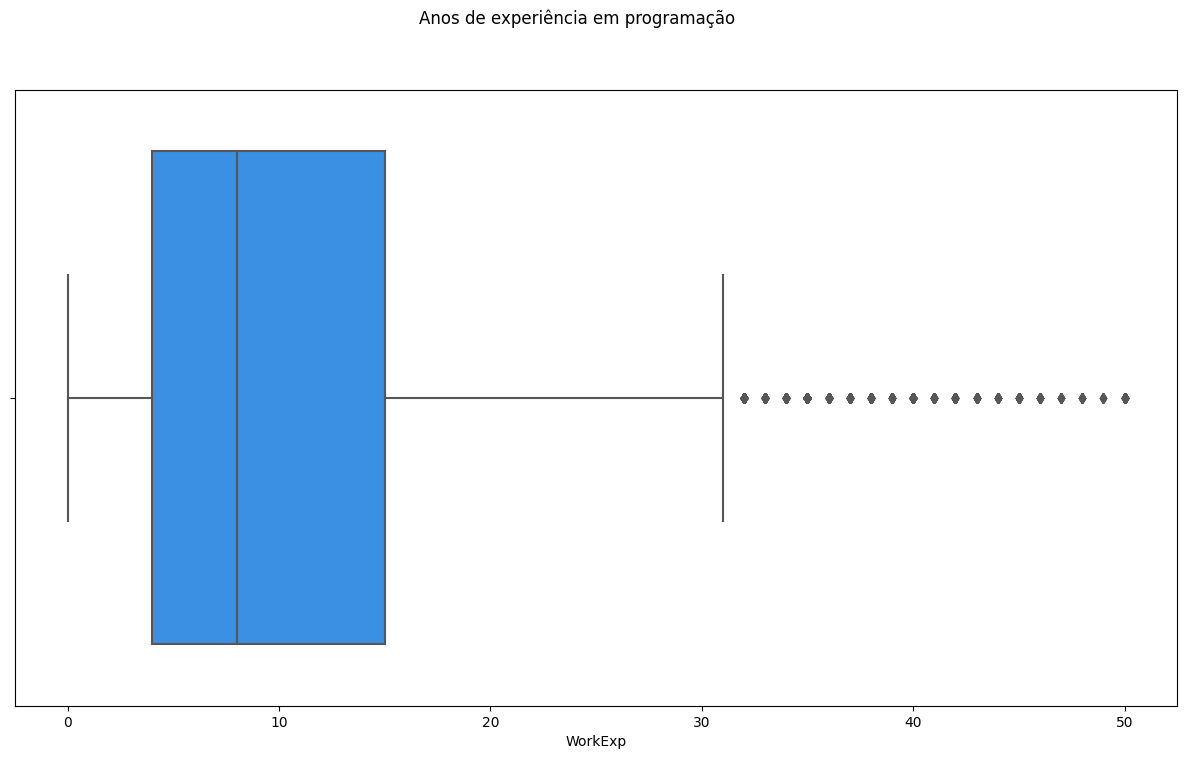

In [ ]:
boxPlot(df,'WorkExp','Anos de experiência em programação')

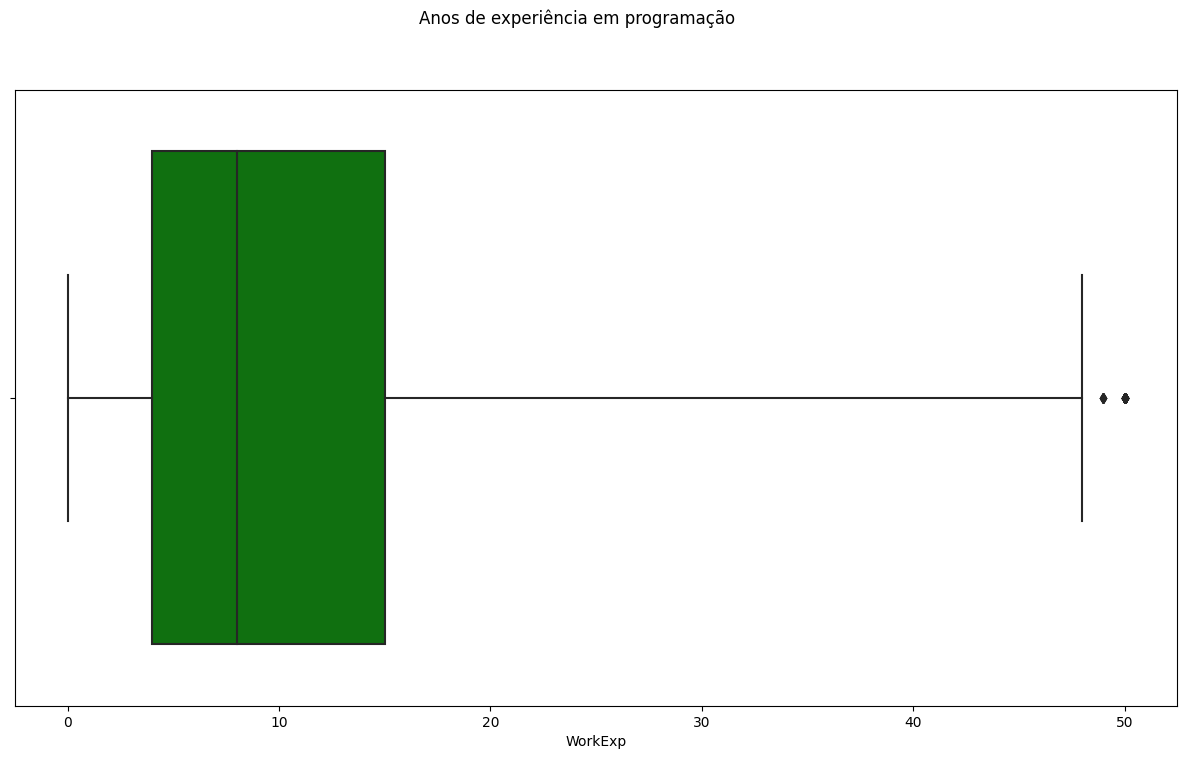

In [ ]:
boxPlot(df,'WorkExp','Anos de experiência em programação',3.0,'green')

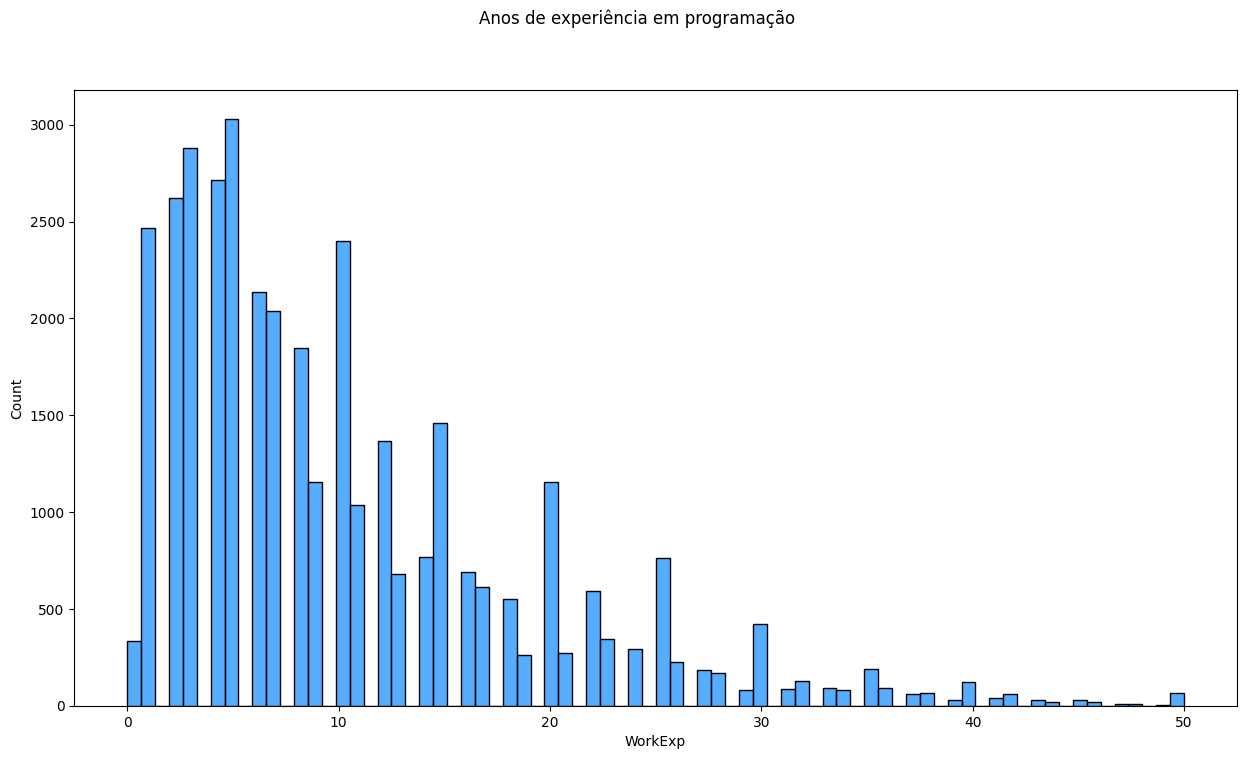

In [ ]:
histograma(df,'WorkExp',titulo='Anos de experiência em programação')

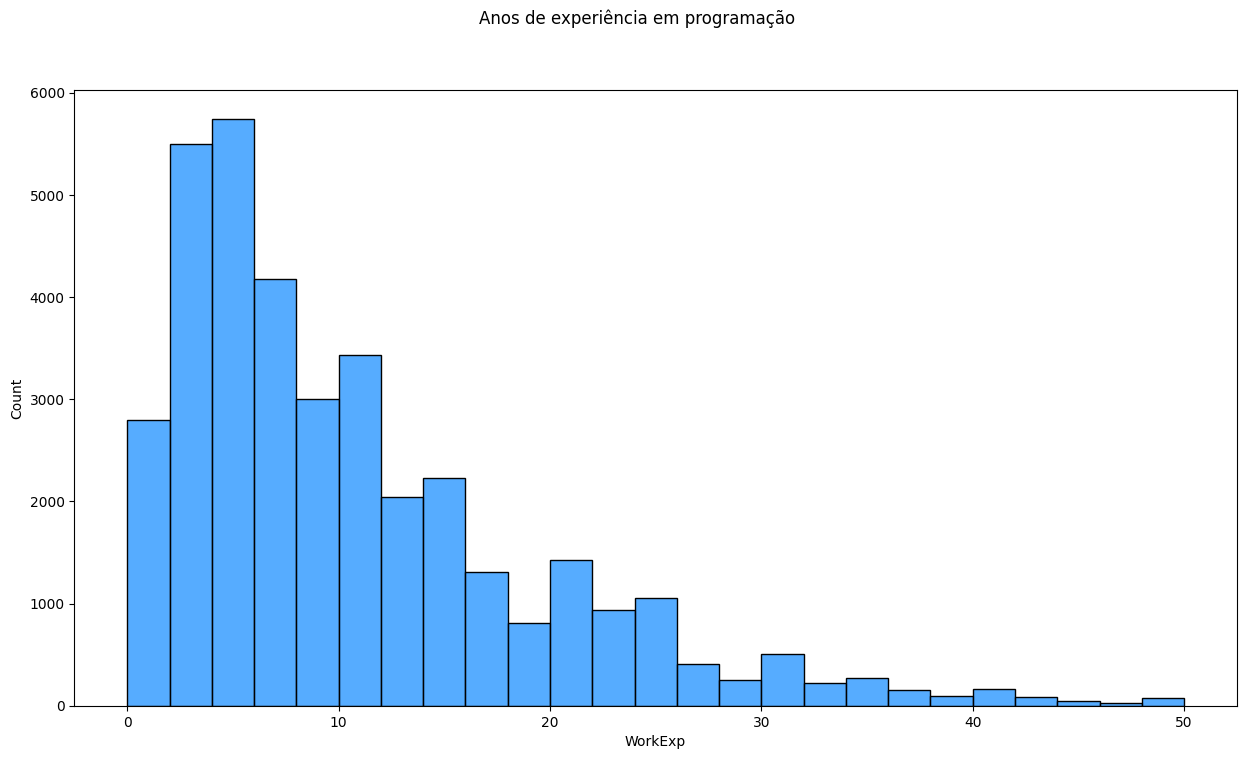

In [ ]:
histograma(df,'WorkExp','Anos de experiência em programação',2)

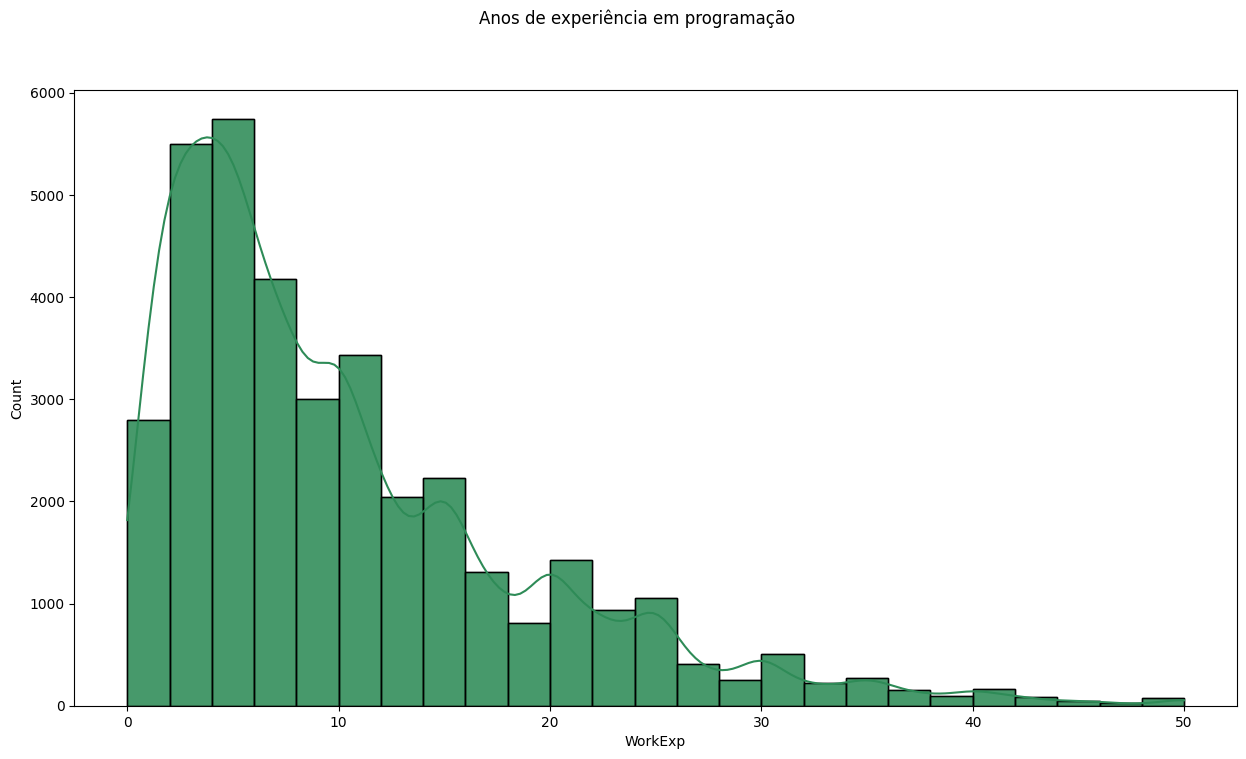

In [ ]:
histograma(df,'WorkExp','Anos de experiência em programação',2,'linha','seagreen')

### A relação entre boxplot e histogramas

É possível ver uma relação direta entre um boxplot e um histograma de um conjunto de dados. Afinal, ambos são formas de representar uma distribuição de dados.

Essa relação fica mais clara se plotarmos os dados um abaixo do outro (aproveitando também para plotar as linhas dos quantis e da média):

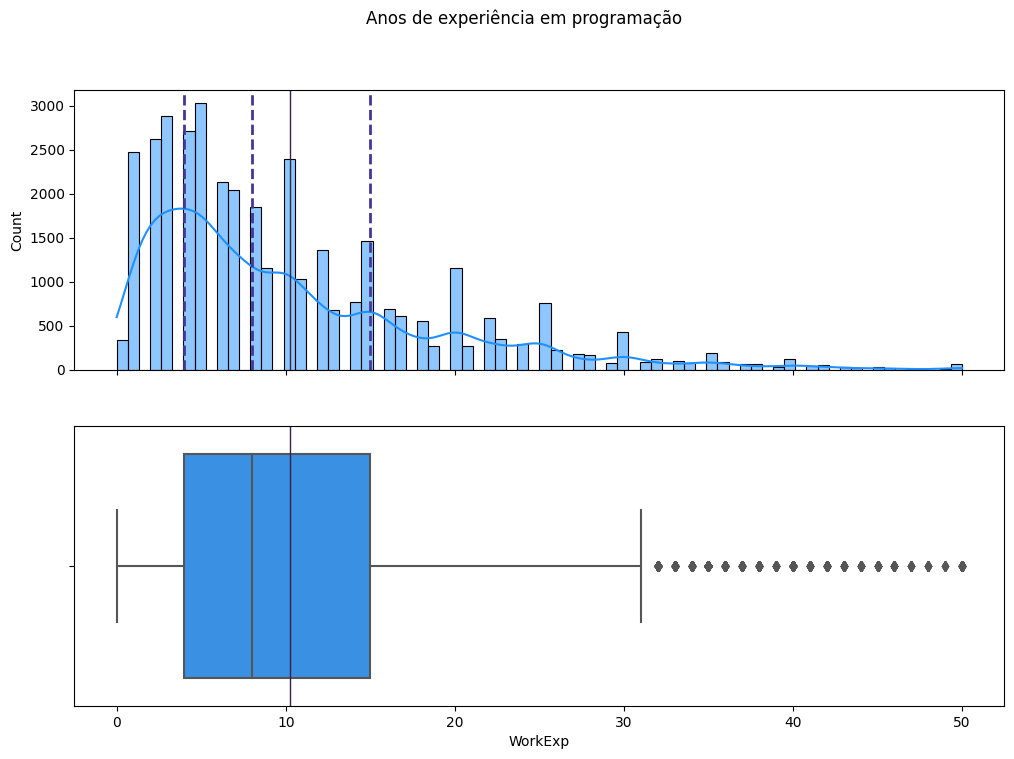

In [ ]:
histogramaBoxplot(df,'WorkExp','Anos de experiência em programação')

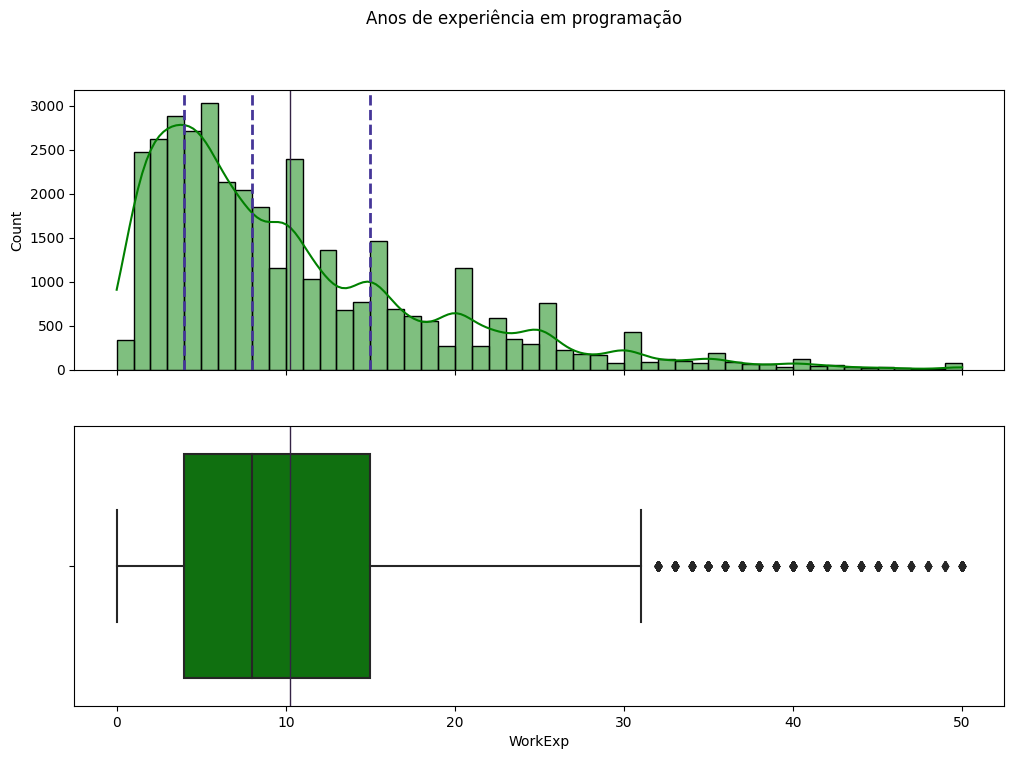

In [ ]:
histogramaBoxplot(df,'WorkExp','Anos de experiência em programação',1,0,'green')

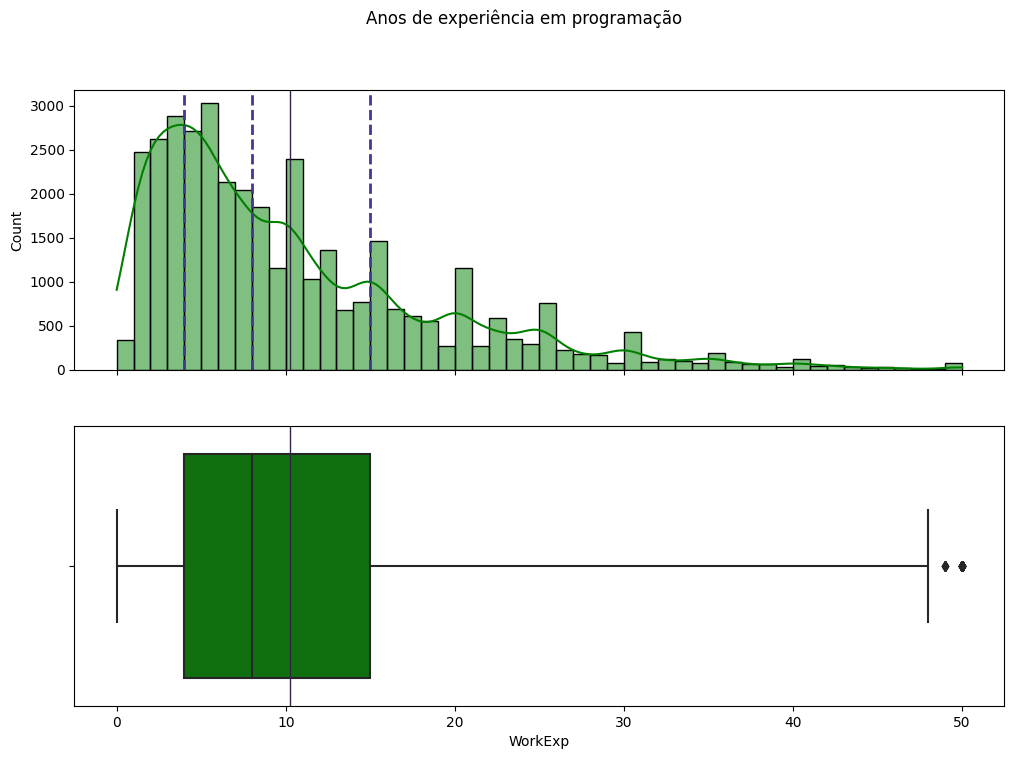

In [ ]:
histogramaBoxplot(df,'WorkExp','Anos de experiência em programação',1,3,'green')

Podemos reunir as duas visualizações (forma da distribuição + posição dos quantis) em um mesmo gráfico, se usando um gráfico de violino!

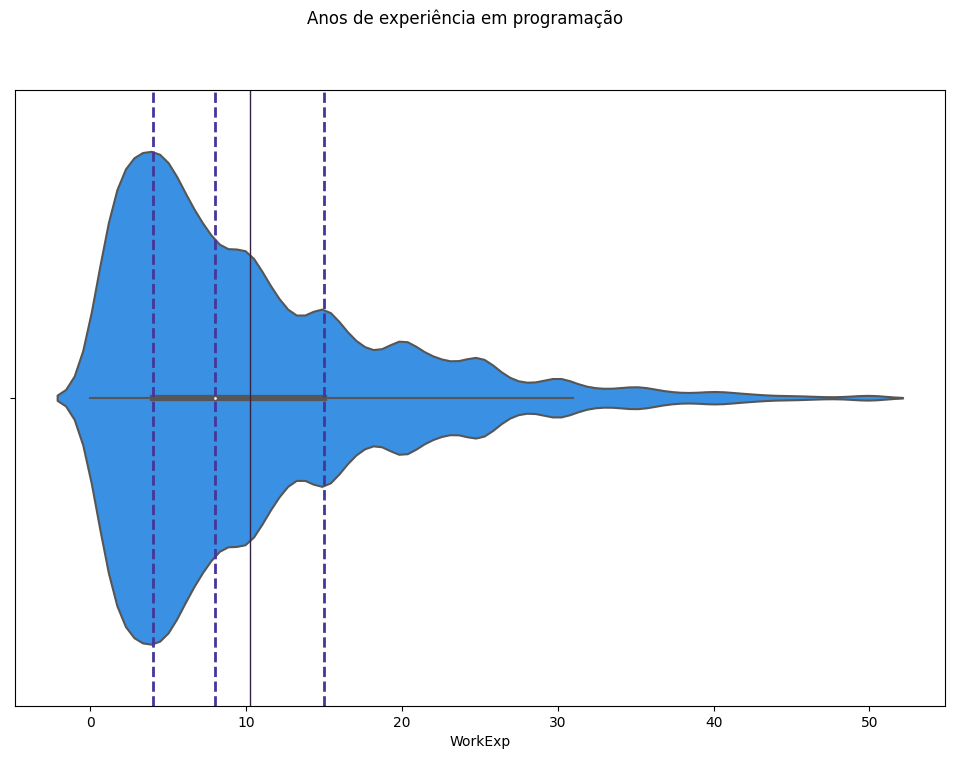

In [ ]:
violino(df,'WorkExp','Anos de experiência em programação')

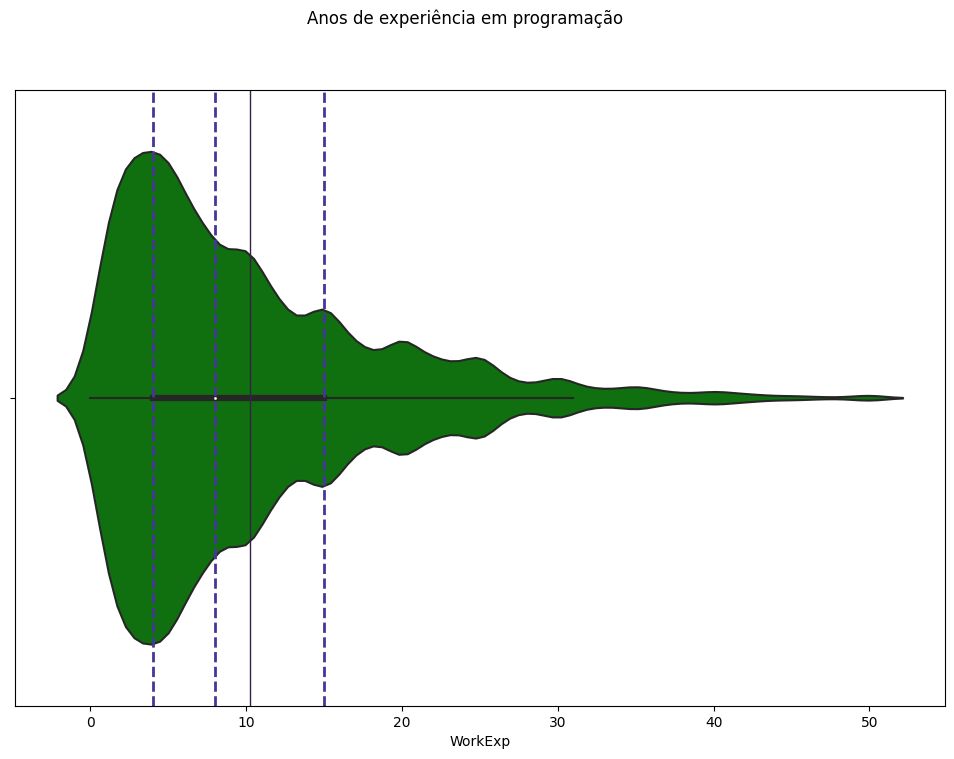

In [ ]:
violino(df,'WorkExp','Anos de experiência em programação','green')

É possível comparar diferentes distribuições com violinplots. Nesse caso, cada distribuição se torna um violino:

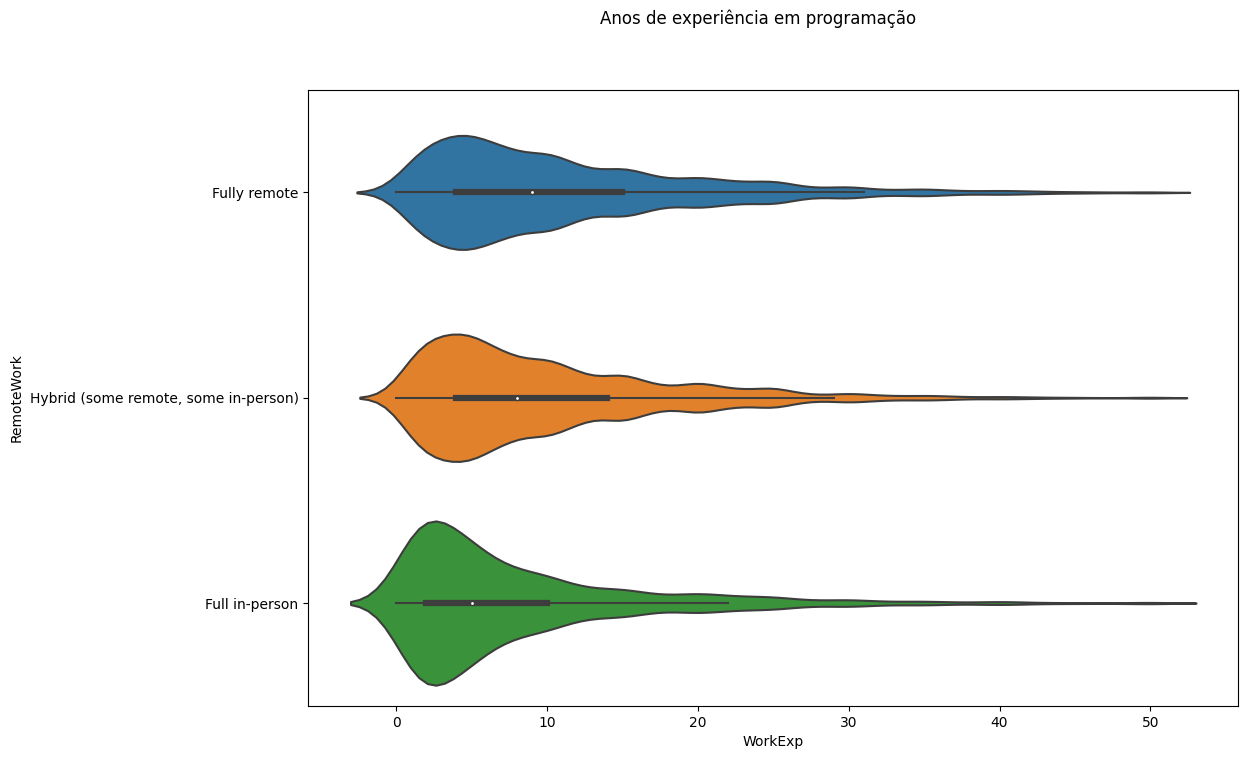

In [ ]:
violinoDuasColunas(df,'WorkExp','RemoteWork','Anos de experiência programando')